# 8. Neural Networks and Deep Learning

This session, we'll learn about neural nets and build a model for classifying images of clothes.

## 8.1 Fashion Classification

Dataset:

- Full: https://github.com/alexeygrigorev/clothing-dataset
- Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

- CS231n CNN for Visual Recognition: https://cs231n.github.io/

The dataset can be downloaded using the following command in the notebook:

```bash
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git
```

## 8.2 TensorFlow and Keras

- Installing TensorFlow
- Loading Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

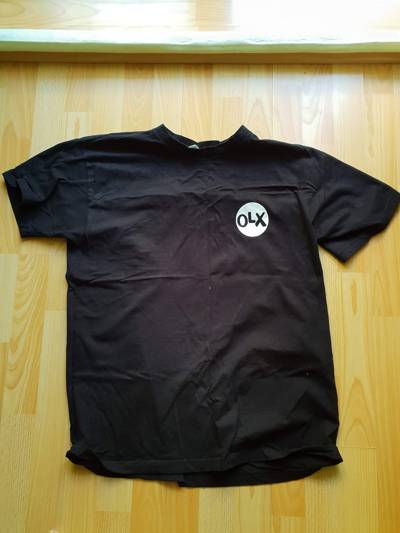

In [2]:
# Set image file path and load the image using keras 'load_img' function
path = '../input/mlzoomcampimageclassification/zoomcamp-image-classification/clothing-dataset-small/train/t-shirt'
filename = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{filename}'
load_img(fullname)

In [3]:
# Load image by setting image size of 299 x 299
img = load_img(fullname, target_size=(299, 299))

In [4]:
# Convert image into an array
x = np.array(img)
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 253, 248]],

       [[188, 179, 110],
        [187, 178, 109],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 190, 128],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  24],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [5]:
# Check image shape
x.shape

(299, 299, 3)

Each row of the image represent a pixel and each element of these pixels represents color channels, where the first element is `Red`, second is `Green`, and third is of `Blue` color.

## 8.3 Pre-trained Convolutional Neural Networks

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [6]:
# Import pre-trained model (Xception), preprocessing layer, and function to decode predictions
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [7]:
# Build model (use the weights the model was trained on)
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2022-11-12 18:40:03.668444: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 18:40:03.669396: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 18:40:04.039374: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 18:40:04.040250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-12 18:40:04.041011: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

91897856/91884032 [==============================] - 0s 0us/step


In [8]:
# Create an array of image (pass into list for batch_size)
X = np.array([x])
X, X.shape

(array([[[[179, 171,  99],
          [179, 171,  99],
          [181, 173, 101],
          ...,
          [251, 253, 248],
          [251, 253, 248],
          [251, 253, 248]],
 
         [[188, 179, 110],
          [187, 178, 109],
          [186, 177, 108],
          ...,
          [251, 252, 247],
          [251, 252, 247],
          [251, 252, 246]],
 
         [[199, 189, 127],
          [200, 190, 128],
          [200, 190, 128],
          ...,
          [250, 251, 245],
          [250, 251, 245],
          [250, 251, 245]],
 
         ...,
 
         [[165, 151,  76],
          [173, 159,  84],
          [171, 157,  82],
          ...,
          [183, 135,  24],
          [181, 133,  22],
          [183, 135,  24]],
 
         [[165, 151,  76],
          [173, 159,  84],
          [171, 157,  82],
          ...,
          [182, 134,  23],
          [180, 132,  21],
          [182, 134,  23]],
 
         [[165, 151,  76],
          [173, 159,  84],
          [171, 157,  82],
   

In [9]:
# Apply preprocessing layer
X = preprocess_input(X)
X

array([[[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.41960788,  0.35686278, -0.20784312],
         ...,
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.9843137 ,  0.94509804],
         [ 0.96862745,  0.9843137 ,  0.94509804]],

        [[ 0.47450984,  0.4039216 , -0.1372549 ],
         [ 0.4666667 ,  0.39607847, -0.14509803],
         [ 0.45882356,  0.38823533, -0.15294117],
         ...,
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.9372549 ],
         [ 0.96862745,  0.9764706 ,  0.92941177]],

        [[ 0.56078434,  0.48235297, -0.00392157],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         ...,
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863],
         [ 0.9607843 ,  0.96862745,  0.92156863]],

        ...,

        [[ 0.2941177 ,  0.18431377, -0

In [10]:
# Make predictions
pred = model.predict(X)
pred

2022-11-12 18:40:11.623334: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-12 18:40:14.438682: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


array([[3.23797984e-04, 1.57364309e-04, 2.14056068e-04, 1.52957378e-04,
        2.46565673e-04, 3.04462417e-04, 3.23487475e-04, 1.47259663e-04,
        2.04866097e-04, 1.48656152e-04, 1.95694069e-04, 2.11569102e-04,
        7.61278425e-05, 1.14591581e-04, 1.64077399e-04, 2.07021410e-04,
        1.96368012e-04, 1.44514721e-04, 1.40078628e-04, 1.73651686e-04,
        7.50312582e-04, 2.55688617e-04, 2.66562653e-04, 2.96249927e-04,
        3.71849019e-04, 2.81153480e-04, 2.16759698e-04, 2.26841803e-04,
        3.82646278e-04, 1.72122935e-04, 3.08604154e-04, 1.97759669e-04,
        3.93641938e-04, 4.78195900e-04, 2.90634373e-04, 3.26480600e-04,
        1.47040177e-04, 1.63522069e-04, 2.14072599e-04, 1.34214759e-04,
        2.41729897e-04, 6.72481954e-04, 2.53319769e-04, 1.42904100e-04,
        4.11025831e-04, 2.05692239e-04, 3.04202549e-04, 1.49993633e-04,
        2.00595197e-04, 2.28324730e-04, 2.97196646e-04, 2.30766993e-04,
        6.29546354e-04, 7.80995237e-04, 2.47868011e-04, 4.030103

In [11]:
# Decode prediction in readable formation
decode_predictions(pred)

49152/35363 [=========================================] - 0s 0us/step


[[('n03595614', 'jersey', 0.6792449),
  ('n02916936', 'bulletproof_vest', 0.03960036),
  ('n04370456', 'sweatshirt', 0.035299573),
  ('n03710637', 'maillot', 0.01088412),
  ('n04525038', 'velvet', 0.0018057581)]]

## 8.4 Convolutional Neural Networks

- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer Learning

- Reading data with `ImageDataGenerator`
- Train `Xception` on smaller images (150x150)

Better to run it with a GPU

In [12]:
# Import image data generator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Build image generator for training (takes preprocessing input function)
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Train images directory
train_imgs_dir= '../input/mlzoomcampimageclassification/zoomcamp-image-classification/clothing-dataset-small/train'

# Load in train dataset into train generator
train_ds = train_gen.flow_from_directory(directory=train_imgs_dir,
                                         target_size=(150,150),
                                         batch_size=32)

Found 3068 images belonging to 10 classes.


In [14]:
# Check total number of classes in train dataset
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [15]:
# Unpack features and target variables
X, y = next(train_ds)

In [16]:
# Labels are OHE
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [17]:
# Create image generator for validation
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Validation image directory
val_imgs_dir = '../input/mlzoomcampimageclassification/zoomcamp-image-classification/clothing-dataset-small/validation'

# Load in image for validation
val_ds = val_gen.flow_from_directory(val_imgs_dir,
                                     target_size=(150,150),
                                     batch_size=32,
                                     shuffle=False) # False for validation

Found 341 images belonging to 10 classes.


In [18]:
# Build base model
base_model = Xception(weights='imagenet',
                      include_top=False, # to create custom dense layer
                      input_shape=(150,150,3))

# Freeze the convolutional base by preventing the weights being updated during training
base_model.trainable = False

# Define expected image shape as input
inputs = keras.Input(shape=(150,150,3))

# Feed inputs to the base model
base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer

# Convert matrices into vectors using pooling layer
vectors = keras.layers.GlobalAveragePooling2D()(base)

# Create dense layer of 10 classes
outputs = keras.layers.Dense(10)(vectors)

# Create model for training
model = keras.Model(inputs, outputs)

83697664/83683744 [==============================] - 0s 0us/step


In [19]:
# Define learning rate
learning_rate = 0.01

# Create optimizer
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Define loss function
loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

# Compile the model
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy']) # evaluation metric accuracy

In [20]:
# Train the model, validate it with validation data, and save the training history
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 43s 410ms/step - loss: 1.2191 - accuracy: 0.6636 - val_loss: 0.9166 - val_accuracy: 0.7625
Epoch 2/10
96/96 [==============================] - 18s 189ms/step - loss: 0.5459 - accuracy: 0.8168 - val_loss: 1.0596 - val_accuracy: 0.7771
Epoch 3/10
96/96 [==============================] - 18s 182ms/step - loss: 0.3877 - accuracy: 0.8768 - val_loss: 0.8544 - val_accuracy: 0.7830
Epoch 4/10
96/96 [==============================] - 18s 191ms/step - loss: 0.2509 - accuracy: 0.9166 - val_loss: 0.8929 - val_accuracy: 0.7859
Epoch 5/10
96/96 [==============================] - 19s 194ms/step - loss: 0.1325 - accuracy: 0.9544 - val_loss: 0.8923 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 18s 183ms/step - loss: 0.1205 - accuracy: 0.9576 - val_loss: 1.1032 - val_accuracy: 0.7801
Epoch 7/10
96/96 [==============================] - 18s 189ms/step - loss: 0.1107 - accuracy: 0.9609 - val_loss: 0.8992 - val_accuracy: 0.8065

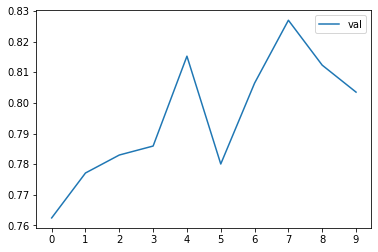

In [21]:
# Plot history of train and validation accuracy
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

plt.show()

## 8.6 Adjusting the Learning Rate

- What's the learning rate
- Trying different values

In [22]:
# Function to create model
def make_model(learning_rate=0.01):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [23]:
# Dictionary to store history with different learning rates
scores = {}

# List of learning rates
lrs = [0.0001, 0.001, 0.01, 0.1]

for lr in lrs:
    print(lr)
    
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 21s 190ms/step - loss: 2.0217 - accuracy: 0.3064 - val_loss: 1.6848 - val_accuracy: 0.4516
Epoch 2/10
96/96 [==============================] - 18s 190ms/step - loss: 1.4249 - accuracy: 0.5561 - val_loss: 1.2978 - val_accuracy: 0.5836
Epoch 3/10
96/96 [==============================] - 18s 184ms/step - loss: 1.1610 - accuracy: 0.6340 - val_loss: 1.0976 - val_accuracy: 0.6686
Epoch 4/10
96/96 [==============================] - 18s 188ms/step - loss: 1.0116 - accuracy: 0.6864 - val_loss: 0.9746 - val_accuracy: 0.7126
Epoch 5/10
96/96 [==============================] - 18s 186ms/step - loss: 0.9116 - accuracy: 0.7154 - val_loss: 0.8941 - val_accuracy: 0.7331
Epoch 6/10
96/96 [==============================] - 18s 187ms/step - loss: 0.8415 - accuracy: 0.7376 - val_loss: 0.8354 - val_accuracy: 0.7478
Epoch 7/10
96/96 [==============================] - 18s 192ms/step - loss: 0.7870 - accuracy: 0.7555 - val_loss: 0.7913 - val_accuracy:

In [24]:
# Remove two worst learning rates from scores dict
del scores[0.1]
del scores[0.0001]

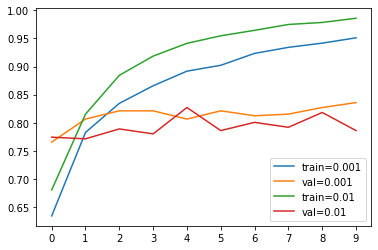

In [25]:
for lr, hist in scores.items():
    # Visualize training accuracy
    plt.plot(hist['accuracy'], label=f'train={lr}')
    # Visualize validation accuracy
    plt.plot(hist['val_accuracy'], label=f'val={lr}')
    
plt.xticks(np.arange(10))
plt.legend()

plt.show()

The best learning rate is `0.001` for two reasons:

1- The comparison between 0.001 and 0.01 for validation accuracy, 0.001 gives slightly better results
2- The gap between train and validation accuracy with 0.001 is smaller as compared to the learning rate of 0.01

In [26]:
# Best learning rate value
learning_rate = 0.001

## 8.7 Checkpointing

- Saving the best model only
- Training a model with callbacks

In [27]:
# Create checkpoint to save best model
filepath = './xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True, # save the best model only
                                             monitor='val_accuracy',
                                             mode='max')

In [28]:
# Define model
model = make_model(learning_rate=learning_rate)

# Train model with checkpoint
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds,
                    callbacks=[checkpoint])

Epoch 1/10
96/96 [==============================] - 20s 192ms/step - loss: 1.0823 - accuracy: 0.6395 - val_loss: 0.7168 - val_accuracy: 0.7801


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
96/96 [==============================] - 17s 181ms/step - loss: 0.6208 - accuracy: 0.7898 - val_loss: 0.6341 - val_accuracy: 0.8152
Epoch 3/10
96/96 [==============================] - 17s 175ms/step - loss: 0.4984 - accuracy: 0.8325 - val_loss: 0.6050 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 18s 183ms/step - loss: 0.4245 - accuracy: 0.8660 - val_loss: 0.5681 - val_accuracy: 0.8094
Epoch 5/10
96/96 [==============================] - 17s 176ms/step - loss: 0.3705 - accuracy: 0.8843 - val_loss: 0.5657 - val_accuracy: 0.8094
Epoch 6/10
96/96 [==============================] - 17s 180ms/step - loss: 0.3207 - accuracy: 0.9078 - val_loss: 0.5346 - val_accuracy: 0.8299
Epoch 7/10
96/96 [==============================] - 17s 176ms/step - loss: 0.2868 - accuracy: 0.9254 - val_loss: 0.5336 - val_accuracy: 0.8299
Epoch 8/10
96/96 [==============================] - 17s 180ms/step - loss: 0.2584 - accuracy: 0.9306 - val_loss: 0.5251 - val_accuracy: 0.8270

The best validation score of 0.833 we have got at epoch 5. 

## 8.8 Adding more layers

- Adding one inner dense layer
- Experimenting with different sizes of inner layer

In [29]:
# Function to define model by adding new dense layer
def make_model(learning_rate=0.01, size_inner=100): # default layer size is 100
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # activation function 'relu'
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [30]:
# Create checkpoint to save best model for version 2
filepath = './xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

# Experiement different number of inner layer with best learning rate
learning_rate = 0.001

scores = {}

# List of inner layer sizes
sizes = [10, 100, 1000]

for size in sizes:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint])
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 [==============================] - 20s 189ms/step - loss: 1.2932 - accuracy: 0.5808 - val_loss: 0.9422 - val_accuracy: 0.7038
Epoch 2/10
96/96 [==============================] - 17s 181ms/step - loss: 0.8292 - accuracy: 0.7324 - val_loss: 0.7686 - val_accuracy: 0.7537
Epoch 3/10
96/96 [==============================] - 17s 178ms/step - loss: 0.6642 - accuracy: 0.7787 - val_loss: 0.6991 - val_accuracy: 0.7595
Epoch 4/10
96/96 [==============================] - 17s 181ms/step - loss: 0.5539 - accuracy: 0.8158 - val_loss: 0.6389 - val_accuracy: 0.7654
Epoch 5/10
96/96 [==============================] - 18s 183ms/step - loss: 0.4670 - accuracy: 0.8435 - val_loss: 0.5813 - val_accuracy: 0.7947
Epoch 6/10
96/96 [==============================] - 18s 186ms/step - loss: 0.4056 - accuracy: 0.8768 - val_loss: 0.5840 - val_accuracy: 0.7713
Epoch 7/10
96/96 [==============================] - 18s 183ms/step - loss: 0.3611 - accuracy: 0.8889 - val_loss: 0.5561 - val_accuracy: 0.7

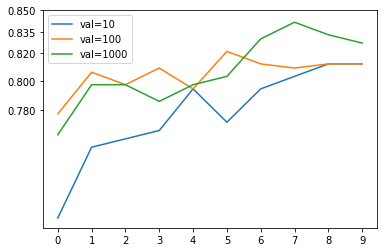

In [31]:
# Visualize validation accuracy
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=f'val={size}')
    
plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.835, 0.85])
plt.legend()

plt.show()

It may not always obvious to get better results by adding new layers and this is one thing we have to consider. However, by looking at the plot above we see that the model gets better result when the layer size is 100. So, for our next experiment, we will keep the new added layer and apply some regularization techniques to improve performance if possible.

## 8.9 Regularization and Dropout

- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [32]:
# Function to define model by adding new dense layer and dropout
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner) # add dropout layer
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [33]:
# Create checkpoint to save best model for version 3
filepath = './xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.001
size = 100

# Dict to store results
scores = {}

# List of dropout rates
droprates = [0.0, 0.2, 0.5, 0.8]

for droprate in droprates:
    print(droprate)
    
    model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                       droprate=droprate)
    
    # Train for longer (epochs=30) cause of dropout regularization
    history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[checkpoint])
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/30
96/96 [==============================] - 22s 192ms/step - loss: 0.9763 - accuracy: 0.6708 - val_loss: 0.7683 - val_accuracy: 0.7419
Epoch 2/30
96/96 [==============================] - 18s 190ms/step - loss: 0.5246 - accuracy: 0.8198 - val_loss: 0.6023 - val_accuracy: 0.7977
Epoch 3/30
96/96 [==============================] - 18s 185ms/step - loss: 0.3528 - accuracy: 0.8784 - val_loss: 0.5791 - val_accuracy: 0.8182
Epoch 4/30
96/96 [==============================] - 19s 198ms/step - loss: 0.2587 - accuracy: 0.9214 - val_loss: 0.5939 - val_accuracy: 0.7830
Epoch 5/30
96/96 [==============================] - 19s 194ms/step - loss: 0.1671 - accuracy: 0.9550 - val_loss: 0.5608 - val_accuracy: 0.8065
Epoch 6/30
96/96 [==============================] - 17s 181ms/step - loss: 0.1172 - accuracy: 0.9746 - val_loss: 0.5718 - val_accuracy: 0.8240
Epoch 7/30
96/96 [==============================] - 18s 191ms/step - loss: 0.0808 - accuracy: 0.9886 - val_loss: 0.6157 - val_accuracy: 0.

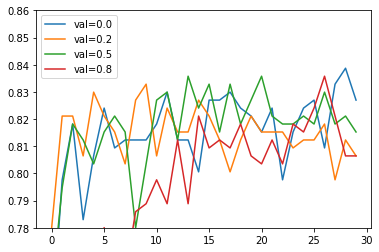

In [34]:
# Visualize validation accuracy on different dropout rates
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=f'val={droprate}')

# Zoom in the accuracy
plt.ylim(0.78, 0.86)
plt.legend()

plt.show()

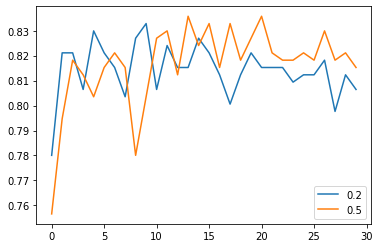

In [35]:
# Visualize scores at drop rates 0.2 and 0.5
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)
hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)
plt.legend()

plt.show()

There is no significant improvement with any of the dropout rates. For the sake of regularization, we'll go ahead with `0.2` dropout.

## 8.10 Data Augmentation

- Different data augmentations
- Training a model with augmentations
- How to select data augmentations?

In [36]:
# Create image generator for train data and also augment the images
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
                               rotation_range=30,
                               width_shift_range=10.0,
                               height_shift_range=10.0,
                               shear_range=10,
                               zoom_range=0.1,
                               vertical_flip=True)

train_ds = train_gen.flow_from_directory(directory=train_imgs_dir,
                                         target_size=(150,150),
                                         batch_size=32)

Found 3068 images belonging to 10 classes.


In [37]:
# Create checkpoint to save best model for version 4
filepath = './xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

# Train the model by setting hyperparameters value based on previous experiments
learning_rate = 0.001
size = 100
droprate = 0.2

# Build model
model = make_model(learning_rate=learning_rate,
                   size_inner=size,
                   droprate=droprate)

# Train the model for longer cause of augmented data
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 37s 362ms/step - loss: 1.4292 - accuracy: 0.5336 - val_loss: 0.8341 - val_accuracy: 0.7537
Epoch 2/50
96/96 [==============================] - 34s 351ms/step - loss: 1.0805 - accuracy: 0.6274 - val_loss: 0.7315 - val_accuracy: 0.7713
Epoch 3/50
96/96 [==============================] - 33s 347ms/step - loss: 0.9059 - accuracy: 0.6995 - val_loss: 0.7244 - val_accuracy: 0.7654
Epoch 4/50
96/96 [==============================] - 33s 346ms/step - loss: 0.8893 - accuracy: 0.7047 - val_loss: 0.7316 - val_accuracy: 0.7566
Epoch 5/50
96/96 [==============================] - 33s 348ms/step - loss: 0.8378 - accuracy: 0.7125 - val_loss: 0.6642 - val_accuracy: 0.7683
Epoch 6/50
96/96 [==============================] - 34s 348ms/step - loss: 0.7951 - accuracy: 0.7256 - val_loss: 0.6839 - val_accuracy: 0.7742
Epoch 7/50
96/96 [==============================] - 33s 347ms/step - loss: 0.7921 - accuracy: 0.7357 - val_loss: 0.6763 - val_accuracy: 0.7625

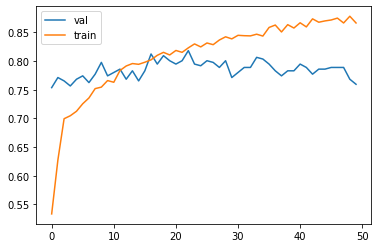

In [38]:
# Visualize train and validation accuracy
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')
plt.legend()

plt.show()

The validation accuracy has even gone down after data augmentation. Probably we should try larger input size, reduce the amount of data augmentation and lower the learning rate in the next experiment.

## 8.11 Training a Larger Model

- Train a 299x299 model

In [39]:
# Set larger image input size
input_size = 299

In [40]:
# Build image generator for training (takes preprocessing input function)
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Train images directory
train_imgs_dir= '../input/mlzoomcampimageclassification/zoomcamp-image-classification/clothing-dataset-small/train'

# Load in train dataset into train generator
train_ds = train_gen.flow_from_directory(directory=train_imgs_dir,
                                         target_size=(input_size,input_size),
                                         batch_size=32)

# Create image generator for validation
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Validation image directory
val_imgs_dir = '../input/mlzoomcampimageclassification/zoomcamp-image-classification/clothing-dataset-small/validation'

# Load in image for validation
val_ds = val_gen.flow_from_directory(val_imgs_dir,
                                     target_size=(input_size,input_size),
                                     batch_size=32,
                                     shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [41]:
# Function to define model by adding input_size, learning_rate, size_inner for layer, and droprate for dropout
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(input_size,input_size,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(input_size,input_size,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner) # add dropout layer
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [42]:
# Create checkpoint to save best model for version 5
filepath = './xception_v5_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

# Train the model on smaller learning rate (0.0005)
learning_rate = 0.0005
size = 100
droprate = 0.2

# Build model
model = make_model(input_size=input_size,
                   learning_rate=learning_rate,
                   size_inner=size,
                   droprate=droprate)

# Train the model for 50 epochs
history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 39s 365ms/step - loss: 0.9488 - accuracy: 0.7040 - val_loss: 0.5059 - val_accuracy: 0.8299
Epoch 2/50
96/96 [==============================] - 32s 327ms/step - loss: 0.4787 - accuracy: 0.8334 - val_loss: 0.4171 - val_accuracy: 0.8563
Epoch 3/50
96/96 [==============================] - 31s 321ms/step - loss: 0.3883 - accuracy: 0.8670 - val_loss: 0.3762 - val_accuracy: 0.8680
Epoch 4/50
96/96 [==============================] - 32s 325ms/step - loss: 0.3318 - accuracy: 0.8885 - val_loss: 0.3620 - val_accuracy: 0.8680
Epoch 5/50
96/96 [==============================] - 31s 324ms/step - loss: 0.2858 - accuracy: 0.9097 - val_loss: 0.3682 - val_accuracy: 0.8768
Epoch 6/50
96/96 [==============================] - 32s 328ms/step - loss: 0.2693 - accuracy: 0.9153 - val_loss: 0.3505 - val_accuracy: 0.8798
Epoch 7/50
96/96 [==============================] - 32s 327ms/step - loss: 0.2374 - accuracy: 0.9231 - val_loss: 0.3532 - val_accuracy: 0.8827

The best model performance is at epoch 34 with the accuracy of `0.897` on validation. We will use this model for evaluation.

## 8.12 Using the Model

- Loading the model
- Evaluating the model
- Getting predictions

The notebook is restarted for evaluation that's why we need to import the libraries again.

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

In [44]:
# Create image generator for test data
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Path of test images directory
test_imgs_dir = '../input/mlzoomcampimageclassification/zoomcamp-image-classification/clothing-dataset-small/test'

# Load in test images to generator
test_ds = test_gen.flow_from_directory(directory=test_imgs_dir,
                                       target_size=(299,299),
                                       batch_size=32,
                                       shuffle=False)

Found 372 images belonging to 10 classes.


In [45]:
# Best model path
model_path = '../input/clothing-best-model/xception_v5_34_0.897.h5'

# Load the best model
model = keras.models.load_model(filepath=model_path)

In [46]:
# Evaluate the model on test set
model.evaluate(test_ds)

12/12 [==============================] - 6s 449ms/step - loss: 0.3037 - accuracy: 0.8925


[0.3036818206310272, 0.8924731016159058]

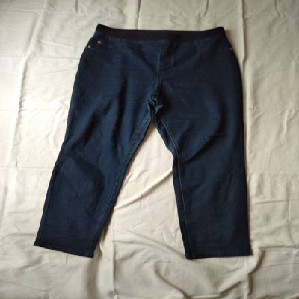

In [47]:
# Path of an image to make predictions
img_path = '../input/mlzoomcampimageclassification/zoomcamp-image-classification/clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

# Load image
img = load_img(img_path, target_size=(299,299))
img

In [48]:
import numpy as np

# Convert image to numpy array
x = np.array(img)
# Add batch dimension to the image
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [49]:
# Preprocess the image 
X = preprocess_input(X)
X

array([[[[ 0.09803927,  0.06666672, -0.01960784],
         [ 0.10588241,  0.07450986, -0.01176471],
         [ 0.12156868,  0.09019613,  0.00392163],
         ...,
         [ 0.05098045,  0.0196079 , -0.0745098 ],
         [ 0.05882359,  0.02745104, -0.06666666],
         [-0.04313725, -0.0745098 , -0.16862744]],

        [[ 0.12156868,  0.09019613,  0.00392163],
         [ 0.13725495,  0.10588241,  0.0196079 ],
         [ 0.14509809,  0.11372554,  0.02745104],
         ...,
         [ 0.05098045,  0.0196079 , -0.0745098 ],
         [ 0.05882359,  0.02745104, -0.06666666],
         [-0.00392157, -0.03529412, -0.12941176]],

        [[ 0.13725495,  0.10588241,  0.0196079 ],
         [ 0.15294123,  0.12156868,  0.03529418],
         [ 0.16078436,  0.12941182,  0.04313731],
         ...,
         [ 0.04313731,  0.01176476, -0.08235294],
         [ 0.05882359,  0.02745104, -0.06666666],
         [ 0.02745104, -0.00392157, -0.09803921]],

        ...,

        [[ 0.20000005,  0.18431377,  0

In [50]:
# Make prediction
pred = model.predict(X)[0]
pred

array([-5.7913594, -7.7320986, -2.6308198, -5.009567 , 11.629687 ,
       -2.5361528, -6.091181 ,  3.451638 , -8.03737  , -2.6488116],
      dtype=float32)

In [51]:
# Get the class names for multi-class dataset
import pathlib

class_dir = pathlib.Path('../input/mlzoomcampimageclassification/zoomcamp-image-classification/clothing-dataset-small/train')
class_names = sorted([item.name for item in class_dir.glob('*')]) # sort the class names as appeared in the train directory
class_names

['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [52]:
# Zip the class names and prediction
dict(zip(class_names, pred))

{'dress': -5.7913594,
 'hat': -7.7320986,
 'longsleeve': -2.6308198,
 'outwear': -5.009567,
 'pants': 11.629687,
 'shirt': -2.5361528,
 'shoes': -6.091181,
 'shorts': 3.451638,
 'skirt': -8.03737,
 't-shirt': -2.6488116}

Indeed the image is of pants so the model prediction is correct.

## 8.13 Summary

- We can use pre-trained models for general image classification
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions
- Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
- First, train a small model (150x150) before training a big one (299x299)
- Learning rate - how fast the model trians. Fast learners aren't always best ones
- We can save the best model using callbacks and checkpointing
- To avoid overfitting, use dropout and augmentation

## 8.14 Explore More

- Add more data, e.g. Zalando, etc (ADD LINKS)
- Albumentations - another way of generating augmentations
- Use PyTorch or MXNet instead of TensorFlow/Keras
- In addition to Xception, there are others architectures - try them

**Other projects:**

- cats vs dogs
- Hotdog vs not hotdog
- Category of images